<div padding=20px><img src ="movies.jpg" width = "300" height = "30" align="left" margin='20'> </div>
<p><h2 style="color:#00008B" align='center'> Data Project - Examining Movies Performance Using Correllation and Testing</h2></p>
<Hr style ="color:Grey">_____________________________________________________________________________________________________________________________</Hr>

In [1]:
## Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


In [117]:
## Import Data
moviedata = pd.read_csv(r'C:\Users\user\Desktop\Analytics\Projects\MovieAnaysis\movies.csv')
moviedata.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [93]:
## Overview of Data structure
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
moviedata.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [10]:
moviedata.shape

(7668, 15)

In [11]:
##Clean Data - Check for null Values

In [118]:

moviedata['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [22]:
#Order Data
moviedata.sort_values(by=['gross'], inplace = False, ascending =False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [16]:
for col in moviedata.columns:
    percent_null = np.mean(moviedata[col].isnull())
    print('{} - {}%'.format(col, round(percent_null)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


<AxesSubplot:>

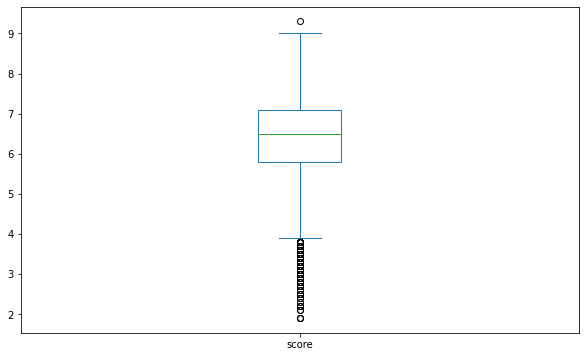

In [17]:
#in the absence of null values , are there outliers especially with predictable columns 

moviedata['score'].plot(kind='box', figsize = (10, 6))


In [18]:
##Confirm Data correllation

In [19]:
moviedata.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [20]:
## There seems to be a reasonable correllation between a Movies earning(Gross) and Budget as well as Score
## Visualizing Correllating variables

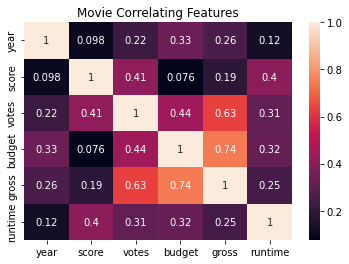

In [32]:
sns.heatmap(moviedata.corr(), annot = True)
plt.title("Movie Correlating Features")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

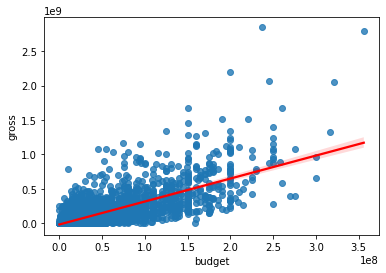

In [29]:
##Budget and gross

sns.regplot(x='budget', y = 'gross', data = moviedata, line_kws ={"color":"red"})

<AxesSubplot:xlabel='score', ylabel='gross'>

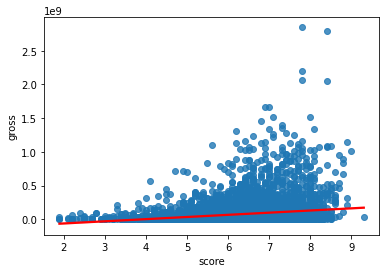

In [30]:
##Movie Score and gross

sns.regplot(x='score', y = 'gross', data = moviedata, line_kws ={"color":"red"})

In [33]:
## Finding Correllation between A movies performance to it Director, Company of production, genre, star actor etc

In [38]:
#Using factorise to determine Corr
CorrMatrix = moviedata.apply(lambda x: x.factorize()[0]).corr(method='pearson')
CorrMatrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


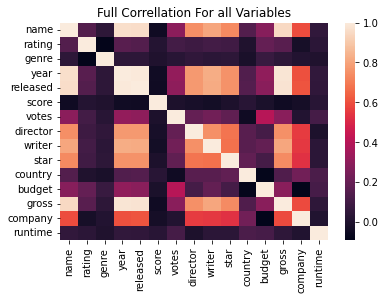

In [40]:
sns.heatmap(CorrMatrix)
plt.title('Full Correllation For all Variables')
plt.show()

In [44]:
## Isolating Variables with Higher correllation
Corrunstacked = CorrMatrix.unstack()
corrpair = Corrunstacked.sort_values(kind="quicksort")
corrpair

budget   company   -0.092249
company  budget    -0.092249
genre    rating    -0.086723
rating   genre     -0.086723
budget   country   -0.082082
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [51]:
# we can now determine higher correlating variables
higherCorr = corrpair[abs(corrpair) >0.4]
higherCorr.head(20)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.607954
company   released    0.607954
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
dtype: float64

In [53]:
higherCorr = corrpair[abs(corrpair) >0.8]
higherCorr.head(20)

writer    name        0.805211
name      writer      0.805211
gross     writer      0.805576
writer    gross       0.805576
          released    0.819617
released  writer      0.819617
year      writer      0.824770
writer    year        0.824770
name      gross       0.947324
gross     name        0.947324
name      released    0.959015
released  name        0.959015
name      year        0.965761
year      name        0.965761
released  gross       0.976423
gross     released    0.976423
year      gross       0.980873
gross     year        0.980873
released  year        0.993190
year      released    0.993190
dtype: float64

<h3> Movie Financial Performance</h3>

In [124]:
# Top ten performing movies based o gross earning
Top10Movies = moviedata[['name','gross']].sort_values(by=['gross'], inplace = False, ascending =False)
Top10Movies =Top10Movies.head(10)
Top10Movies

,name,gross
5445,Avatar,2.847246e+09
7445,Avengers: Endgame,2.797501e+09
3045,Titanic,2.201647e+09
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09
7244,Avengers: Infinity War,2.048360e+09
7480,The Lion King,1.670728e+09
6653,Jurassic World,1.670516e+09
6043,The Avengers,1.518816e+09
6646,Furious 7,1.515341e+09
7494,Frozen II,1.450027e+09


<function matplotlib.pyplot.show(close=None, block=None)>

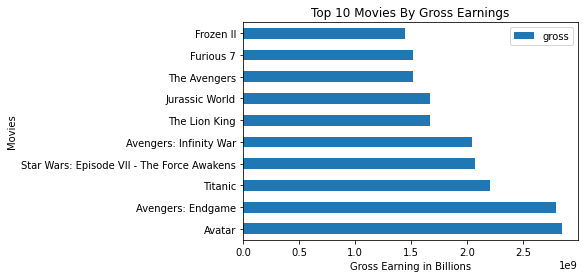

In [129]:
Top10Movies.plot.barh(x='name', y='gross')
plt.title('Top 10 Movies By Gross Earnings')
plt.ylabel('Movies')
plt.xlabel('Gross Earning in Billions')
plt.show

In [134]:
##Top 10 Performing Companies by gross earnings
Top10Companies = moviedata.groupby('company')[['gross']].sum()
Top10Companies=Top10Companies.sort_values(by=['gross'], inplace = False, ascending =False)
Top10Companies =Top10Companies.head(10)
Top10Companies

,gross
company,
Warner Bros.,5.649142e+10
Universal Pictures,5.251419e+10
Columbia Pictures,4.300894e+10
Paramount Pictures,4.049361e+10
Twentieth Century Fox,4.025705e+10
Walt Disney Pictures,3.632789e+10
New Line Cinema,1.988380e+10
Marvel Studios,1.506559e+10
DreamWorks Animation,1.187361e+10


<function matplotlib.pyplot.show(close=None, block=None)>

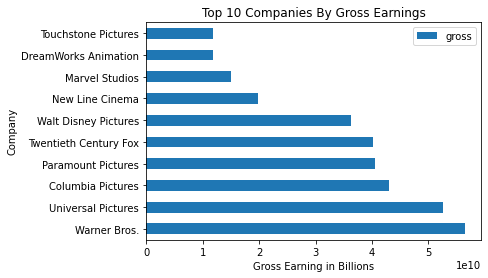

In [136]:
Top10Companies.plot.barh()
plt.title('Top 10 Companies By Gross Earnings')
plt.ylabel('Company')
plt.xlabel('Gross Earning in Billions')
plt.show

In [141]:
#Budget to earning chart
Top10CompaniesByBG = moviedata.groupby('company')[['gross','budget']].sum()
Top10CompaniesByBG=Top10Companies.sort_values(by=['gross'], inplace = False, ascending =False)
Top10CompaniesByBG =Top10Companies.head(10)
Top10CompaniesByBG

,gross,budget
company,,
Warner Bros.,5.649142e+10,1.956830e+10
Universal Pictures,5.251419e+10,1.598973e+10
Columbia Pictures,4.300894e+10,1.551211e+10
Paramount Pictures,4.049361e+10,1.372345e+10
Twentieth Century Fox,4.025705e+10,1.147460e+10
Walt Disney Pictures,3.632789e+10,1.040470e+10
New Line Cinema,1.988380e+10,5.648200e+09
Marvel Studios,1.506559e+10,2.664000e+09
DreamWorks Animation,1.187361e+10,3.344000e+09


<function matplotlib.pyplot.show(close=None, block=None)>

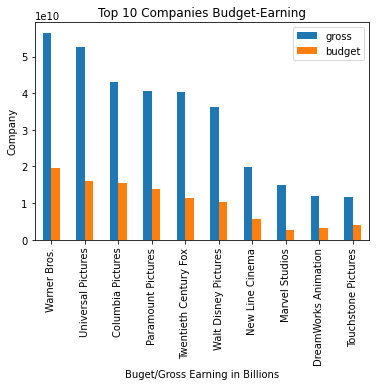

In [142]:
Top10CompaniesByBG.plot.bar()
plt.title('Top 10 Companies Budget-Earning')
plt.ylabel('Company')
plt.xlabel('Buget/Gross Earning in Billions')
plt.show